In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
from sklearn.model_selection import train_test_split
X, y = iris.iloc[:,:-1].values, iris.iloc[:, -1].values
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std = sc.transform(test_X)

In [ ]:
import numpy as np
cov_mat = np.cov(train_X_std.T)

In [ ]:
cov_mat

array([[ 1.00961538, -0.03658858,  0.89282533,  0.84057159],
       [-0.03658858,  1.00961538, -0.3421826 , -0.2898399 ],
       [ 0.89282533, -0.3421826 ,  1.00961538,  0.9779029 ],
       [ 0.84057159, -0.2898399 ,  0.9779029 ,  1.00961538]])

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues : %s' %eigen_vals)

Eigenvalues : [2.8998938  0.98708902 0.13466453 0.01681419]


In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
var_exp

[0.7180689405527698,
 0.2444220436332153,
 0.033345502524849045,
 0.0041635132891658525]

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

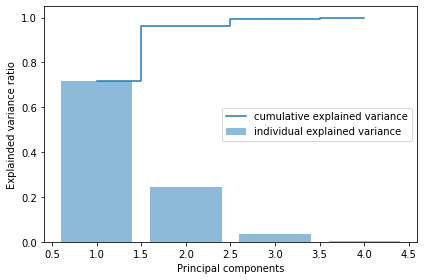

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1,5), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,5), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explainded variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()

plt.show()

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse = True)
eigen_pairs

[(2.8998937983861857,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649079,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.134664529427275,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283169787,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W : \n', w)

Matrix W : 
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [ ]:
train_X_pca = train_X_std.dot(w)

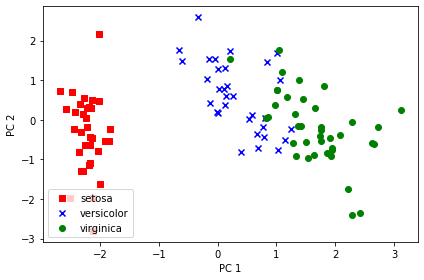

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(train_y), colors, markers):
  plt.scatter(train_X_pca[train_y == l, 0], train_X_pca[train_y == l,1], c= c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes= (50, 30))
mlp.fit(train_X_pca, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print(mlp.score(train_X_pca, train_y))

0.9333333333333333


In [ ]:
test_X_pca = test_X_std.dot(w)
pred = mlp.predict(test_X_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [ ]:
import pandas as pd
confusion_matrix = pd.crosstab(test_y, pred, margins= True, rownames = ['True'], colnames = ['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,0,11,11
All,16,15,14,45


In [ ]:
print(mlp.score(test_X_pca, test_y))

0.9333333333333333


In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species

In [ ]:
pca = PCA(n_components = 2)
iris_pca = pca.fit_transform(iris_X)

In [ ]:
iris_pca[:5, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [ ]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [ ]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [18, 24, 61.5, 49, 52, 105, 130, 125]

In [ ]:
A = np.c_[x, [1] * 8]
B = np.array(y)

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
U

array([[-0.09523708, -0.75291219, -0.30570949, -0.28090959, -0.27189145,
        -0.25160063, -0.24258249, -0.23581888],
       [-0.19045071, -0.49902645, -0.10192726,  0.12193311,  0.20333687,
         0.38649535,  0.46789912,  0.52895194],
       [-0.28566433, -0.24514071,  0.91852536, -0.0671799 , -0.06198182,
        -0.05028612, -0.04508804, -0.04118947],
       [-0.3511237 , -0.07059426, -0.09192115,  0.8886239 , -0.11845062,
        -0.13436831, -0.14144283, -0.14674873],
       [-0.37492711, -0.00712283, -0.09571988, -0.12744744,  0.86101527,
        -0.16494364, -0.17648094, -0.18513391],
       [-0.42848478,  0.1356879 , -0.10426703, -0.16360796, -0.18518648,
         0.76626184, -0.25531668, -0.27150057],
       [-0.45228818,  0.19915934, -0.10806576, -0.1796793 , -0.20572059,
        -0.26431349,  0.70964522, -0.30988575],
       [-0.47014074,  0.24676291, -0.1109148 , -0.19173281, -0.22112118,
        -0.287245  , -0.31663336,  0.66132536]])

In [ ]:
s

array([336.0759044 ,   0.99321713])

In [ ]:
VT

array([[-0.99996895, -0.00788011],
       [ 0.00788011, -0.99996895]])

In [ ]:
S = np.zeros((1,1))
S[0][0] = s[0]

In [ ]:
A2 = U[:, 0:1] @S @VT[0:1, 0:1]

In [ ]:
A2

array([[ 32.00589279],
       [ 64.00390571],
       [ 96.00191863],
       [118.00055252],
       [126.00005575],
       [143.99893802],
       [151.99844125],
       [157.99806867]])

In [ ]:
A

array([[ 32,   1],
       [ 64,   1],
       [ 96,   1],
       [118,   1],
       [126,   1],
       [144,   1],
       [152,   1],
       [158,   1]])

In [ ]:
weight, bias = np.linalg.inv(A.T @ A)@A.T@B
weight, bias

(0.8744839346616398, -26.72383773110744)

In [ ]:
x2 = np.c_[A2, [1]*8]

In [ ]:
weight2, bias2 = np.linalg.inv(A2.T @ A2) @A2.T @ B
weight2, bias2 

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


NameError: ignored

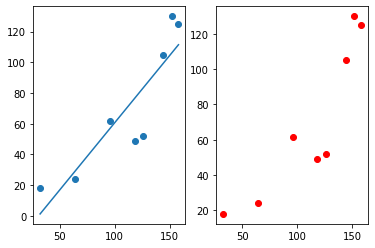

In [ ]:
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(x,y)
ax[0].plot(A[:, 0 ], weight * A [:,0] + bias, '-')
ax[1].scatter(A2[:, 0], y, color = 'red')
ax[1].plot(A2[:, 0], weight * A2[:,0] + bias2, '-.', color = 'red')
plt.show()

In [ ]:
Uw , Uv = np.linalg.eig(A @ A.T)
Uv

array([[-9.52370763e-02+0.00000000e+00j,  7.52912191e-01+0.00000000e+00j,
        -3.82054792e-01+0.00000000e+00j,  1.09306425e-01+0.00000000e+00j,
        -3.30811714e-05+7.92805098e-06j, -3.30811714e-05-7.92805098e-06j,
         1.92120027e-05+0.00000000e+00j, -4.11979138e-05+0.00000000e+00j],
       [-1.90450705e-01+0.00000000e+00j,  4.99026450e-01+0.00000000e+00j,
         4.79868025e-01+0.00000000e+00j,  1.07053949e-01+0.00000000e+00j,
         6.35138250e-07-3.54557509e-06j,  6.35138250e-07+3.54557509e-06j,
         4.08662902e-06+0.00000000e+00j, -2.35259980e-07+0.00000000e+00j],
       [-2.85664334e-01+0.00000000e+00j,  2.45140710e-01+0.00000000e+00j,
        -1.55883859e-01+0.00000000e+00j, -2.07385928e-02+0.00000000e+00j,
        -8.17847568e-02+2.34230543e-01j, -8.17847568e-02-2.34230543e-01j,
         3.11149259e-01+0.00000000e+00j,  1.28986605e-01+0.00000000e+00j],
       [-3.51123704e-01+0.00000000e+00j,  7.05942631e-02+0.00000000e+00j,
         4.93813475e-01+0.00000000e

In [ ]:
Vw, Vv = np.linalg.eig(A.T @ A)
Vv

array([[ 0.99996895, -0.00788011],
       [ 0.00788011,  0.99996895]])

In [ ]:
s = np.sqrt(Vw)

In [ ]:
s

array([336.0759044 ,   0.99321713])

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
U, s, VT = np.linalg.svd(iris.data)
U

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [ ]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [ ]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [ ]:
N = 3
S = np.zeros((3,3))
for i in range(N):
  S[i][i] = s[i]

In [ ]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [ ]:
iris2 = U[:, 0:3] @S @VT[0:3, 0:3]
iris_df = pd.DataFrame(data = np.c_[iris2, iris.target], columns = ['A', 'B', 'C','Species'])
iris_df.head()

,A,B,C,Species
0,5.099009,3.500980,1.401484,0.0
1,4.868704,3.030949,1.446898,0.0
2,4.694221,3.205715,1.308660,0.0
3,4.625181,3.075098,1.462266,0.0
4,5.019480,3.580736,1.370809,0.0


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], test_size = 0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter =1000)
mlp.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred, rownames = ['True'], colnames=['Pred'], margins=True)
confusion_matrix

Pred,0.0,1.0,2.0,All
True,,,,
0.0,13,0,0,13
1.0,0,15,1,16
2.0,0,0,16,16
All,13,15,17,45


In [ ]:
mlp.score(test_x, test_y)

0.9777777777777777

In [ ]:
from sklearn import datasets
from sklearn.utils.extmath import randomized_svd
import numpy as np
import pandas as pd


In [ ]:
iris = datasets.load_iris()

In [ ]:
U, s, VT = randomized_svd(iris['data'], n_components=3, n_iter = 5, random_state=None)

In [ ]:
s

array([95.95991387, 17.76103366,  3.46093093])

In [ ]:
VT

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [-0.50215472,  0.67524332,  0.05916621,  0.53701625]])

In [ ]:
S = np.zeros((3,3))
for i in range(3):
  S[i][i] = s[i]

In [ ]:
S #대각행렬

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [ ]:
iris2 = U @ S @ VT[:, 0:3]

In [ ]:
columns = ['A', 'B', 'C', 'Species']


In [ ]:
iris_df = pd.DataFrame(data = np.c_[iris2,
                                    iris['target_names'][iris['target']]],
                       columns = columns)

In [ ]:
iris_df.head()

,A,B,C,Species
0,5.099009419824259,3.500979593534085,1.401484399539957,setosa
1,4.868703642816379,3.0309492455919695,1.4468980697813862,setosa
2,4.694221066713817,3.2057148384549725,1.3086598198929993,setosa
3,4.625181192541417,3.0750980950373643,1.4622655979398018,setosa
4,5.0194796252879055,3.5807364255354734,1.3708094836498779,setosa


In [ ]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter = ';')
redwine.head()

FileNotFoundError: ignored

In [ ]:
X = redwine.iloc[:, :-1]; y = redwine.iloc[:,-1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

NameError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(redwine.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm_r')
plt.show()

NameError: ignored

<Figure size 864x720 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model.fit(train_X, train_y)

In [ ]:
rf_model.feature_importances_

NameError: ignored

In [ ]:
import numpy as np
np.sum(rf_model.feature_importances_)

In [ ]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                        columns = ['feature','importance'])

In [ ]:
features.sort_values (by = 'importance', ascending=False, inplace = True)
features.reset_index(drop = True, inplace = True)
features

In [ ]:
plt.figure(figsize = (12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize = 12, rotation = 45)
plt.show()

NameError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
y_stack = np.cumsum(features.importance, axis = 0)
plt.figure(figsize = (12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize = 12, rotation = 45)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

In [ ]:
rfe_model.get_support()

In [ ]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data = np.c_[X.columns.values, rfe_model.get_support()],
                            columns = ['feature','selected'])
features_rfe.sort_values(by = 'selected', ascending = False)

In [ ]:
features.merge(features_rfe)

In [ ]:
import pickle

with open('rfe.model', 'wb') as f:
  pickle.dump(rfe_model, f)

In [ ]:
import pickle
with open('rfe.model', 'rb') as f:
  rfe_model = pickle.load(f)

In [ ]:
rfe_model.predict(test_X[:10])

In [ ]:
test_y[:10].values

array([2., 1., 2., 1., 1., 2., 1., 0., 2., 2.])

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X_scaled, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [ ]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_], columns = ['feature', 'coef'])

In [ ]:
features.sort_values('coef', ascending = 'False', inplace = True)
features

,feature,coef
4,NOX,-10.4344029721219
7,DIS,-16.674293582867215
12,LSTAT,-20.61456367645347
9,TAX,-5.910728716948035
0,CRIM,-7.245609178578915
10,PTRATIO,-9.451384184058634
6,AGE,0.33601219093841994
2,INDUS,1.6141996129903822
5,RM,14.591352506822624
3,CHAS,2.4395598751548446


In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [ ]:
X_new = SelectKBest(chi2, k = 1).fit_transform(X, y)
X_new.shape

(150, 1)

In [ ]:
X_new

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X,y = load_digits(return_X_y = True)
X.shape

(1797, 64)

In [ ]:
X_new = SelectKBest(chi2, k = 20).fit_transform(X, y)
X_new.shape

(1797, 20)

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
sex_mean = titanic.groupby('sex')['survived'].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean)

In [ ]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic['survived'].mean()
alpha = 0.7

In [ ]:
def smoothing(n_rows, target_mean):
  return(target_mean * n_rows + global_mean * alpha) / (n_rows + alpha)

In [ ]:
titanic['sex_mean_smoothing'] = titanic.apply(lambda x: smoothing(x['sex_n_rows'], x['sex_mean']), axis = 1)

In [ ]:
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size = 0.2, random_state = 43, shuffle = True)
train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan
from sklearn.model_selection import StratifiedKFold

train_X = train.drop('survived', axis = 1)
train_y = train['survived']
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for tr_idx, val_idx in skf.split(train_X, train_y):
  train_X, X_val = train.iloc[tr_idx], train.iloc[val_idx]

  means = X_val['sex'].map(train_X.groupby('sex')['survived'].mean())
  X_val['sex_mean'] = means
  train_new.iloc[val_idx] = X_val

global_mean = train['survived'].mean()
train_new['sex'] = train_new['sex'].fillna(global_mean)
train_new[['sex', 'sex_mean']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sex,sex_mean
826,male,0.179558
838,male,0.178862
763,female,0.760000
189,male,0.176966
109,female,0.760000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb77fe78110>,
      dtype=object)

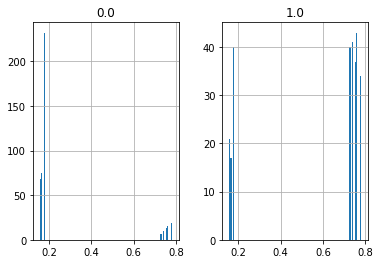

In [ ]:
train_new.pivot_table(columns = 'survived', index = train_new.index, values = 'sex_mean').hist(bins = 100)

In [ ]:
cumsum = train.groupby('sex')['survived'].cumsum() - train['survived']
cumcnt = train.groupby('sex').cumcount() + 1
train_new['sex_mean'] = cumsum/ cumcnt


In [ ]:
train_new[['sex', 'sex_mean']].tail()

,sex,sex_mean
277,male,0.173333
817,male,0.172949
255,female,0.749035
320,male,0.172566
836,male,0.172185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb77fd36c10>,
      dtype=object)

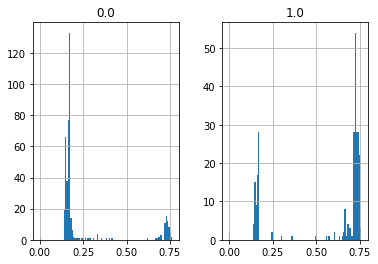

In [ ]:
train_new.pivot_table(columns = 'survived', index = train_new.index,
                      values = 'sex_mean').hist(bins = 100)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

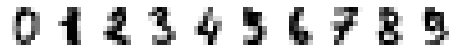

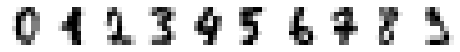

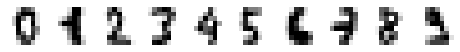

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
N = 30
nrows = (N//10)

for row in range(nrows):
  plt.figure(figsize = (8,8))
  for i in range(10):
    plt.subplot(1, 10 , i+1)
    plt.imshow(digits.images[i + row * 10], cmap = plt.cm.gray_r,
               interpolation = 'nearest')
    plt.axis('off')
  plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC().fit(X,y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X,y)

0.996661101836394

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y , cv= 5)


array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name = 'gamma', param_range = param_range, cv = 10, scoring = 'accuracy', n_jobs = 1
)

CPU times: user 1min 14s, sys: 115 ms, total: 1min 14s
Wall time: 1min 14s


In [ ]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis =1)

Using matplotlib backend: agg


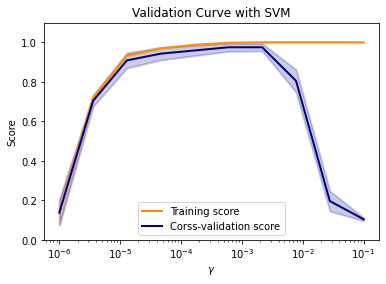

In [ ]:
%matplotlib
import matplotlib.pyplot as plt

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label = 'Training score', color = 'darkorange', lw = lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,  alpha = 0.2,
                 color = 'darkorange', lw = lw)
plt.semilogx(param_range, test_scores_mean, label = 'Corss-validation score', color = 'navy', lw = lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.2,
                 color = 'navy', lw = lw)
plt.legend(loc = 'best')
plt.show()

In [ ]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC

In [ ]:
model = SVC(gamma = gamma).fit(X,y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0021544346900318843,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
model.score(X,y)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, X, y, cv = 5))

0.9655137728257506

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
import pandas as pd

redwine = pd.read_csv('winequality-red.csv', sep = ';')
redwine_X , redwine_y = redwine.iloc[:, :-1], redwine.iloc[:,-1]

FileNotFoundError: ignored

In [ ]:
selection = SelectKBest(k=1)
svm = SVC(kernel = 'linear')
pipeline = Pipeline([('univ_select', selection), ('svm', svm)])
param_grid = dict(univ_select__k = [4, 5, 6, 7, 8, 9, 10, 11],
                  svm__C = [0.1, 1, 10])
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = 2, verbose = 10)
grid_search.fit(redwine_X, redwine_y)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(redwine_X, redwine_y)

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
selection = SelectKBest(k = 1)
combined_features = FeatureUnion([('pca', pca),('univ_select', selection)])
X_features = combined_features.fit(iris_X, iris_y).transform(iris_X)
svm = SVC(kernel = 'linear')

In [ ]:
pipeline = Pipeline([('features', combined_features), ('svm',svm)])
param_grid = dict(features__pca__n_components = [1, 2, 3],
                  features__univ__select__k = [1, 2], 
                  svm__C = [0.1, 1, 10])

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = 5, verbose = 10)
grid_search.fit(iris_X, iris_y)
print(grid_search.best_estimator_)

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a' : [1,2], 'b' : [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [ ]:
param_grid = [{'kernel' : ['linear']}, {'kernel' : ['rbf'], 'gamma' : [1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [ ]:
ParameterGrid(param_grid)[1]

{'gamma': 1, 'kernel': 'rbf'}

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name = 'gamma', param_range = param_range, cv = 10, scoring = 'accuracy', n_jobs =1
)

CPU times: user 1min 14s, sys: 72.3 ms, total: 1min 14s
Wall time: 1min 13s


In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name = 'gamma', param_range = param_range, cv = 10, scoring = 'accuracy', n_jobs =4
)

CPU times: user 898 ms, sys: 164 ms, total: 1.06 s
Wall time: 48.3 s


In [ ]:
%%time
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2


pipe = Pipeline([
                 ('reduce_dim', None),
                 ('classify', LinearSVC())
])


N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]

param_grid = [
              {
                  'reduce_dim' : [PCA(iterated_power=7), NMF()],
               'reduce_dim__n_components' : N_FEATURES_OPTIONS,
               'classify__C' : C_OPTIONS
              },
              {
                  'reduce_dim' : [SelectKBest(chi2)],
               'reduce_dim__k' : N_FEATURES_OPTIONS,
               'classify__C' : C_OPTIONS
              },
]


reducer_labels = ['PCA', 'NMF', 'KBEST(chi2)']
grid = GridSearchCV(pipe, cv = 5, n_jobs = -1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

CPU times: user 1.83 s, sys: 352 ms, total: 2.18 s
Wall time: 48.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1,
                                  len(N_FEATURES_OPTIONS))

mean_scores = mean_scores.max(axis = 0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels)+1 )+ .5)

plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

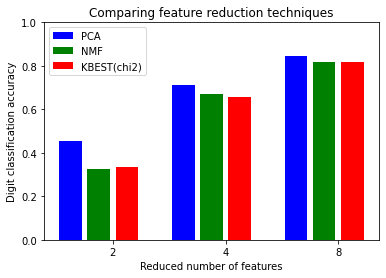

In [ ]:
COLORS = 'bgrcmyk'

for i , (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
  plt.bar(bar_offsets +i, reducer_scores, label = label, color = COLORS[i])

plt.title('Comparing feature reduction techniques')
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0,1))
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory


In [ ]:
cachedir = mkdtemp()
memory = Memory(cachedir = cachedir)
pipe = Pipeline([
                 ('reduce_dim', None),
                 ('classify', LinearSVC())
])


N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]

param_grid = [
              {
                  'reduce_dim' : [PCA(iterated_power=7), NMF()],
               'reduce_dim__n_components' : N_FEATURES_OPTIONS,
               'classify__C' : C_OPTIONS
              },
              {
                  'reduce_dim' : [SelectKBest(chi2)],
               'reduce_dim__k' : N_FEATURES_OPTIONS,
               'classify__C' : C_OPTIONS
              },
]


reducer_labels = ['PCA', 'NMF', 'KBEST(chi2)']
grid = GridSearchCV(pipe, cv = 5, n_jobs = -1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)
rmtree(cachedir)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp/tmpujc61kq5'", use "location='/tmp/tmpujc61kq5'" instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 10000, n_features = 10, n_informative = 5, n_redundant = 0, n_clusters_per_class = 1, n_classes = 2,
                           weights = [0.99, 0.01], random_state = 42)


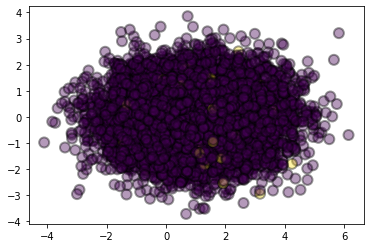

In [ ]:
plt.scatter(x = X[:,0], y = X[:,1], marker = 'o', c = y, s = 100, edgecolor = 'k', linewidth = 2, alpha = 0.4)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.3, random_state =42)
rf_model = RandomForestClassifier(n_estimators = 100, max_features = 2, random_state = 42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [ ]:
rfc_pred = rf_model.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, rfc_pred)

array([[2960,    0],
       [  36,    4]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



In [ ]:
! pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

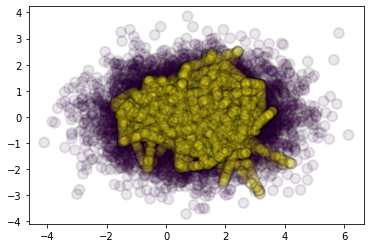

In [ ]:
plt.scatter(x = X_resampled[:,0], y = X_resampled[:,1], marker = 'o', c = y_resampled, s= 100, edgecolor = 'k', linewidth = 2, alpha = 0.1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size = 0.3, shuffle = True, random_state = 42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [ ]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2965,    3],
       [  25, 2923]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2968
           1       1.00      0.99      1.00      2948

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916



In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 10000, n_features = 10, n_informative=5, 
                           n_redundant = 0, n_clusters_per_class = 1, n_classes = 2, weights = [0.99, 0.01],
                           random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.3, stratify = y , random_state = 42)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100,  max_features=2, random_state = 42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [ ]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

from sklearn.metrics import classification_report
print(classification_report(test_y, pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       0.93      0.33      0.49        42

    accuracy                           0.99      3000
   macro avg       0.96      0.67      0.74      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 10000, n_features = 10 , n_informative = 5, n_redundant = 0, n_clusters_per_class= 1, n_classes = 2, weights = [0.99,0.01],
                          random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.3, stratify = y, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, max_features= 2, class_weight={0:1, 1:1.4}, random_state = 42)
rf_model.fit(train_X,train_y)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [ ]:
rfc_pred = rf_model.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.21      0.35        42

    accuracy                           0.99      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
import numpy as np

N = 1000000
bootstrap = np.random.choice(N, N, replace = True)
np.round(len(set(bootstrap))/N, 3)

0.632

In [ ]:
import pandas as pd

wine_df = pd.read_csv('wine.data', header = None)

In [ ]:
wind_df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [ ]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine_df = wine_df[wine_df['Class label']  != 1]
X  = wine_df[['Alcohol', 'Hue']].values
y = wine_df['Class label'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.4, random_state = 1)
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 1)
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
tree.score(test_X, test_y)

0.8333333333333334

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, bootstrap = True, bootstrap_features = False, 
                        random_state = 1)

In [ ]:
bag.fit(train_X, train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, random_state=1)

In [ ]:
bag.score(test_X, test_y)

0.8958333333333334

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
rf.score(test_X, test_y)

0.9166666666666666

In [ ]:
import numpy as np

x_min, x_max = train_X[:,0].min()-1, train_X[:,0].max() +1
y_min, y_max = train_X[:,1].min()-1, train_X[:,1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1),
                     np.arange(y_min, y_max,0.1))

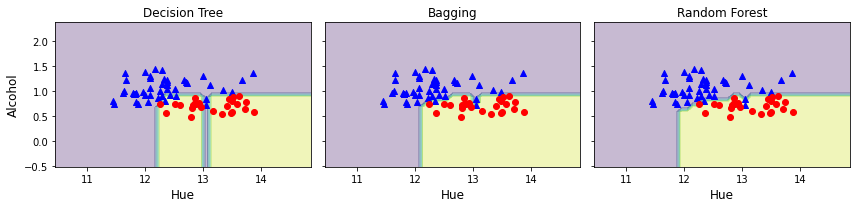

In [ ]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 3, sharex = 'col', sharey = 'row', figsize = (12,3))

model_info = zip([0, 1, 2],
                 [tree, bag, rf],
                 ['Decision Tree', 'Bagging', 'Random Forest'])
for idx, model, title_txt in model_info:
  model.fit(train_X, train_y)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axes[idx].contourf(xx, yy , Z, alpha = 0.3)
  axes[idx].scatter(train_X[train_y == 0,0], train_X[train_y == 0,1],
                    c = 'blue', marker = '^')
  axes[idx].scatter(train_X[train_y == 1,0], train_X[train_y == 1,1],
                    c = 'red', marker = 'o')
  axes[idx].set_title(title_txt)
  axes[idx].set_xlabel('Hue', fontsize = 12)

axes[0].set_ylabel('Alcohol', fontsize = 12) 

plt.tight_layout()
plt.show()
  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abm = AdaBoostClassifier(base_estimator = tree, n_estimators = 500, 
                         random_state = 1)
abm.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=1),
                   n_estimators=500, random_state=1)

In [ ]:
abm.score(test_X, test_y)

0.8333333333333334

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators = 500,  random_state = 1)
gbm.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [ ]:
gbm.score(test_X, test_y)

0.875

In [ ]:
! pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X,train_y, eval_metric = 'logloss')

XGBClassifier()

In [ ]:
xgb.score(test_X, test_y)

0.875

In [ ]:
! pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y)

LGBMClassifier()

In [ ]:
lgbm.score(test_X, test_y)

0.8958333333333334

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_param_grid = {'max_depth' : [3,5,7,9],
                  'subsample' : [0.4, 0.6, 0.8, 1.0]}
grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, scoring = 'roc_auc', n_jobs = -1, cv = 5, 
                    refit = True,  return_train_score = True)

In [ ]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'subsample': [0.4, 0.6, 0.8, 1.0]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

In [ ]:
grid_df.loc[:, ['mean_test_score', 'params']]

,mean_test_score,params
0,0.962667,"{'max_depth': 3, 'subsample': 0.4}"
1,0.971556,"{'max_depth': 3, 'subsample': 0.6}"
2,0.967111,"{'max_depth': 3, 'subsample': 0.8}"
3,0.962667,"{'max_depth': 3, 'subsample': 1.0}"
4,0.962667,"{'max_depth': 5, 'subsample': 0.4}"
5,0.971556,"{'max_depth': 5, 'subsample': 0.6}"
6,0.967111,"{'max_depth': 5, 'subsample': 0.8}"
7,0.962667,"{'max_depth': 5, 'subsample': 1.0}"
8,0.962667,"{'max_depth': 7, 'subsample': 0.4}"
9,0.971556,"{'max_depth': 7, 'subsample': 0.6}"


In [ ]:
grid_df[grid_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.014118,0.000980,0.002972,0.000813,3,0.6,"{'max_depth': 3, 'subsample': 0.6}",0.98,0.977778,1.0,0.988889,0.911111,0.971556,0.031219,1,0.991667,0.985135,0.990541,0.989189,0.995946,0.990495,0.003508
5,0.017614,0.005429,0.002967,0.001086,5,0.6,"{'max_depth': 5, 'subsample': 0.6}",0.98,0.977778,1.0,0.988889,0.911111,0.971556,0.031219,1,0.991667,0.985135,0.990541,0.989189,0.995946,0.990495,0.003508
9,0.013584,0.000274,0.002550,0.000042,7,0.6,"{'max_depth': 7, 'subsample': 0.6}",0.98,0.977778,1.0,0.988889,0.911111,0.971556,0.031219,1,0.991667,0.985135,0.990541,0.989189,0.995946,0.990495,0.003508
13,0.013180,0.000178,0.002440,0.000070,9,0.6,"{'max_depth': 9, 'subsample': 0.6}",0.98,0.977778,1.0,0.988889,0.911111,0.971556,0.031219,1,0.991667,0.985135,0.990541,0.989189,0.995946,0.990495,0.003508


In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 10000, n_features=10, n_informative = 5, 
                           n_redundant = 0, n_clusters_per_class = 1, n_classes = 2,
                           weights = [0.99, 0.11],
                           random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = 0.3, stratify = y, random_state = 42)

from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100 , max_features = 2, random_state = 42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [ ]:
y_pred_rfc = rf_model.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_y, y_pred_rfc)

array([[2956,    2],
       [  27,   15]])

In [ ]:
from sklearn.metrics import confusion_matrix
def model_measure(model, train_X, train_y, test_X, test_y):
  model.fit(train_X, train_y)
  y_pred = model.predict(test_X)
  cm = confusion_matrix(test_y, y_pred)
  precision = cm[1,1] / (cm[0,1] + cm[1,1])
  recall = cm[1,1] / (cm[1,0] + cm[1,1])
  f1score = (2 * precision * recall) / (precision + recall)
  print(f'precision : {precision : .6f}, recall: {recall : .6f}, f1score : {f1score:.6f}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state = 42),
              resampled_X, resampled_y, test_X, test_y)

precision :  0.882353, recall:  0.357143, f1score : 0.508475


In [ ]:
from sklearn.svm import SVC
model_measure(SVC(random_state = 42), resampled_X, resampled_y, test_X, test_y)

precision :  0.214953, recall:  0.547619, f1score : 0.308725


In [ ]:
from sklearn.neural_network import MLPClassifier
model_measure(MLPClassifier(hidden_layer_sizes = (50, ), max_iter = 500),
              resampled_X, resampled_y, test_X, test_y)

precision :  0.479167, recall:  0.547619, f1score : 0.511111


In [ ]:
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth = 10, n_estimators = 100, learning_rate = 0.01, use_label_encoder = False),
              resampled_X, resampled_y, test_X, test_y)

precision :  0.212766, recall:  0.476190, f1score : 0.294118


In [ ]:
from lightgbm import LGBMClassifier
model_measure(LGBMClassifier(n_estimators=100), resampled_X, resampled_y, test_X, test_y)

precision :  0.512195, recall:  0.500000, f1score : 0.506024


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_features = 2, random_state = 42)
xgb_model = XGBClassifier(max_depth = 10, n_estimators=100, learning_rate = 0.01)
lgb_model = LGBMClassifier(n_estimators= 100)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators = [('rfc', rf_model),
                                              ('xgb', xgb_model), 
                                              ('lgbm', lgb_model)],
                                voting = 'hard')

In [ ]:
ests = voting_model.fit(X_resampled, y_resampled)
ests.named_estimators_

{'lgbm': LGBMClassifier(),
 'rfc': RandomForestClassifier(max_features=2, random_state=42),
 'xgb': XGBClassifier(learning_rate=0.01, max_depth=10)}

In [ ]:
ests.get_params()

{'estimators': [('rfc',
   RandomForestClassifier(max_features=2, random_state=42)),
  ('xgb', XGBClassifier(learning_rate=0.01, max_depth=10)),
  ('lgbm', LGBMClassifier())],
 'flatten_transform': True,
 'lgbm': LGBMClassifier(),
 'lgbm__boosting_type': 'gbdt',
 'lgbm__class_weight': None,
 'lgbm__colsample_bytree': 1.0,
 'lgbm__importance_type': 'split',
 'lgbm__learning_rate': 0.1,
 'lgbm__max_depth': -1,
 'lgbm__min_child_samples': 20,
 'lgbm__min_child_weight': 0.001,
 'lgbm__min_split_gain': 0.0,
 'lgbm__n_estimators': 100,
 'lgbm__n_jobs': -1,
 'lgbm__num_leaves': 31,
 'lgbm__objective': None,
 'lgbm__random_state': None,
 'lgbm__reg_alpha': 0.0,
 'lgbm__reg_lambda': 0.0,
 'lgbm__silent': True,
 'lgbm__subsample': 1.0,
 'lgbm__subsample_for_bin': 200000,
 'lgbm__subsample_freq': 0,
 'n_jobs': None,
 'rfc': RandomForestClassifier(max_features=2, random_state=42),
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_dep

In [ ]:
model_measure(voting_model, X_resampled, y_resampled)

TypeError: ignored